In [ ]:
#----------------------ASSIGNMENT 6----------------------!
#---------------------MLR--------------------------------

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler,PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Loading the dataset
data = pd.read_csv("C:\\Users\\Ashish\\Downloads\\Data Science Assignments\\MLR\\ToyotaCorolla - MLR.csv")

# Display dataset summary
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None


In [31]:
# Rename columns for consistency (if needed)
data.rename(columns=lambda x: x.strip(), inplace=True)

In [33]:
# Verify dataset structure
print(data.head())
print(data.info())

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null  

In [3]:
#EDA
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min  

In [5]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


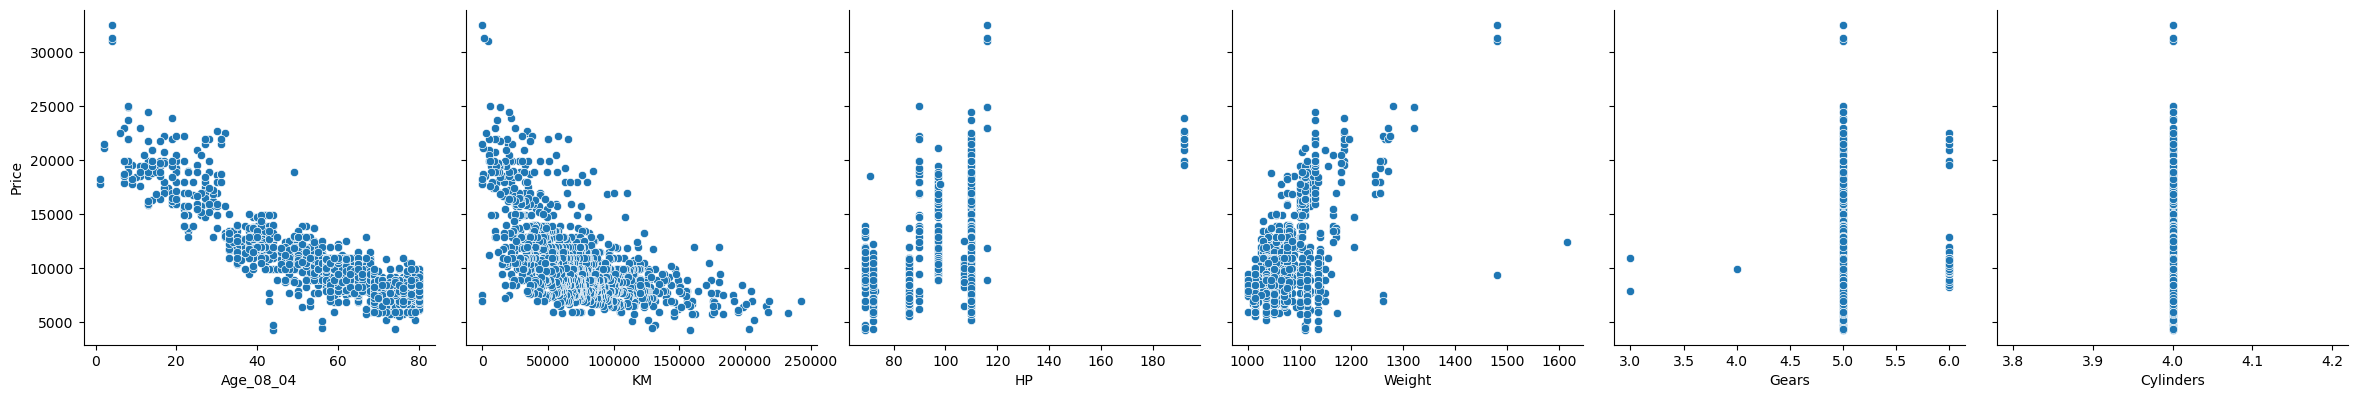

In [95]:
# Visualizations
sns.pairplot(data, x_vars=['Age_08_04', 'KM', 'HP', 'Weight','Gears','Cylinders'], y_vars='Price', height=4, aspect=1, kind='scatter')
plt.show()

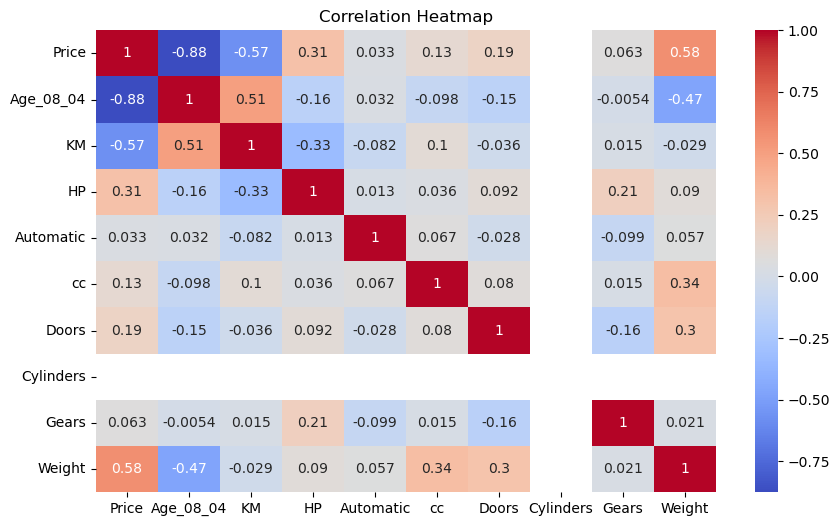

In [13]:
#Correlation heatmap
numerical_features = data.select_dtypes(include=np.number).columns
plt.figure(figsize=(10, 6))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [51]:
# Define features and target variable
target = 'Price'
features = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']

X = data[features]
y = data[target]

# One-hot encode categorical variables
categorical_features = ['Fuel_Type']
numerical_features = ['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight','Automatic']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Preprocessing
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features),('cat', OneHotEncoder(drop='first'), categorical_features)])

In [55]:
# Model 1: Linear Regression with all features
pipeline_lr = make_pipeline(preprocessor, LinearRegression())
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

print("\nModel 1: Linear Regression with All Features")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Model 1: Linear Regression with All Features
R² Score: 0.834888804061108
MAE: 990.8872739193971
RMSE: 1484.2654153296523


In [57]:
# Model 2: Linear Regression with selected features
selected_features = ['Age_08_04', 'KM', 'HP', 'Weight']
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

pipeline_lr2 = make_pipeline(StandardScaler(), LinearRegression())
pipeline_lr2.fit(X_train_sel, y_train)
y_pred_lr2 = pipeline_lr2.predict(X_test_sel)

print("\nModel 2: Linear Regression with Selected Features")
print("R² Score:", r2_score(y_test, y_pred_lr2))
print("MAE:", mean_absolute_error(y_test, y_pred_lr2))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr2)))



Model 2: Linear Regression with Selected Features
R² Score: 0.8506068681500834
MAE: 1001.2017466055833
RMSE: 1411.8502091131115


In [61]:
# Preprocessing (for model 3 and later)
# Separate numerical and categorical transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Polynomial model preprocessing
poly = PolynomialFeatures(degree=2)

# Prepare preprocessing pipeline
preprocessor_poly = ColumnTransformer(transformers=[('num', make_pipeline(StandardScaler(), poly), numerical_features),('cat', OneHotEncoder(drop='first'), categorical_features)])

In [65]:
# Model 3: Polynomial Regression with preprocessing
X_train_poly = preprocessor_poly.fit_transform(X_train)
X_test_poly = preprocessor_poly.transform(X_test)

pipeline_poly = make_pipeline(StandardScaler(), LinearRegression())
pipeline_poly.fit(X_train_poly, y_train)
y_pred_poly = pipeline_poly.predict(X_test_poly)

print("\nModel 3: Polynomial Regression")
print("R² Score:", r2_score(y_test, y_pred_poly))
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))


Model 3: Polynomial Regression
R² Score: 0.876352797804889
MAE: 864.8882532884187
RMSE: 1284.4448255973725


In [87]:
# Lasso and Ridge Regularization
alphas = [0.1, 1, 10]
for alpha in alphas:
    # Lasso
    lasso = make_pipeline(preprocessor_poly, Lasso(alpha=alpha))
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    print(f"\nLasso (alpha={alpha}): R² Score: {r2_score(y_test, y_pred_lasso)}")
    print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


Lasso (alpha=0.1): R² Score: 0.87919719992505
MAE: 862.7476984498276
RMSE: 1269.585071244924

Lasso (alpha=1): R² Score: 0.885820712738487
MAE: 858.8973968714893
RMSE: 1234.2893178889365

Lasso (alpha=10): R² Score: 0.9083688585048035
MAE: 835.3629679976038
RMSE: 1105.7192105040801


C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.026e+08, tolerance: 1.503e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.627e+08, tolerance: 1.503e+06
  model = cd_fast.enet_coordinate_descent(


In [89]:
# Ridge
for alpha in alphas:
    ridge = make_pipeline(preprocessor_poly, Ridge(alpha=alpha))
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    print(f"\nRidge (alpha={alpha}): R² Score: {r2_score(y_test, y_pred_ridge)}")
    print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Ridge (alpha=0.1): R² Score: 0.8777881945645803
MAE: 863.5129313148635
RMSE: 1276.9676245435392

Ridge (alpha=1): R² Score: 0.8840992260015134
MAE: 858.164134181893
RMSE: 1243.559228297313

Ridge (alpha=10): R² Score: 0.8965466904714025
MAE: 851.0455698684808
RMSE: 1174.8853834405284


In [ ]:
#-----------------Interview Questions------------------------

In [ ]:
#1..What is Normalization & Standardization and how is it helpful?

Answer:
To guarantee that every feature has the same scale, normalization rescales the data to a predetermined range, usually [0, 1]. When features have varying ranges or units, this is helpful.
By transforming the data into a mean of 0 and a standard deviation of 1, standardization facilitates the learning and interpretation of relationships by models. 
Both methods contribute to better model performance and convergence.

In [ ]:
#2.What techniques can be used to address multicollinearity in multiple linear regression?

Answer:

Eliminate Highly Correlated Variables: Multicollinearity can be decreased by eliminating one of the highly correlated predictors if there are two or more. When their predictive power does not differ significantly, this is extremely helpful.

PCA: By reducing the correlated features into a smaller number of uncorrelated components, Principal Component Analysis (PCA) helps remove multicollinearity while keeping the majority of the initial variance.

Ridge: Ridge regression addresses multicollinearity by decreasing the coefficients of linked variables by adding a penalty element to the linear regression cost function.

Lasso: Multicollinearity is decreased using Lasso Regression, which likewise applies a penalty but does so in a way that allows some coefficients to be set to zero. This effectively selects significant characteristics and eliminates less significant ones.

VIF: A variable is said to have high multicollinearity if its VIF is high (more than 5 or 10). We need to consider about changing or eliminating these factors.

Centering the Data: To lessen the correlation between variables without sacrificing any information, deduct the mean of each predictor from the corresponding values.

In [ ]:
#------------------------------FINISH--------------------------------!